In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

In [2]:
df = pd.read_csv('watermelon.csv')
#type(df[['density', 'ratio_suger']].values)
X = df[['density', 'ratio_suger']].values
y = df['label'].values
#print(X, type(X))
#print(y, type(y))

In [5]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [13]:
# plot functions
def plot_data(lda, X, y, y_pred):
    plt.figure()
    plt.title('Linear Discriminant Analysis')
    plt.xlabel('Sugar Rate')
    plt.ylabel('Density')
    tp = (y == y_pred)  # True Positive //Boolean matrix

    tp0, tp1 = tp[y == 0], tp[y == 1]
#     print('tp0:', tp0)
#     print('tp1:', tp1)
#     print('tp:', tp)
    X0, X1 = X[y == 0], X[y == 1]
#     print('X0:', X0)
#     print('X1:', X1)
#     print('~tp0:', ~tp0)
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]
    # class 0: dots
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 's', color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], 'o', color='#990000')  # dark red

    # class 1: dots
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 's', color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], 'o', color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    print(x_min, x_max)
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    #print(Z)
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='k')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             'o', color='black', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='black', markersize=10)

[1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.21644999999999998 0.80055


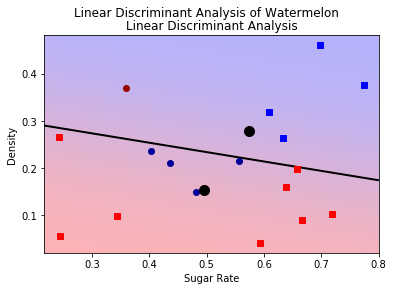

In [14]:
# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
#y_pred = lda.fit(X, y).predict(X)
lda.fit(X, y)
y_pred = lda.predict(X)
print(y_pred)
plot_data(lda, X, y, y_pred)
plt.axis('tight')
plt.suptitle('Linear Discriminant Analysis of Watermelon')
plt.show()

In [ ]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
# print('x:', x)
# print('y:', y)
#xx, yy = np.meshgrid(x, y, sparse=True)
xx, yy = np.meshgrid(x, y)
# print('xx:', xx)
# print('yy:', yy)
# print(xx.ravel())
# print(yy.ravel())
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
#print('z:', z)
h = plt.contourf(x,y,z)

In [3]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])